# Introduction #

In this report, I will explore the unsupervised machine learning method of K-Means clustering on a dataset. Unsupervised machine learning involves machine learning algorithms that extract and discover patterns from unlabeled data[<sup>1</sup>](#fn1). K-Means clustering is an example of unsupervised machine learning and it works by grouping data points based on how near they are to other data points and how far they are to other groups of data points[<sup>2</sup>](#fn2). 

The distance of how far and how close the points are, is measured by the distance of each data point a calculated center or centroid. The centroids are predetermined before the clustering and are the center of each cluster. K-Means clustering has many different business applications such as customer segmentation. Businesses use customer segmentation to identify important patterns in customer needs or how businesses can market their products. This in return, gives businesses a way to stand out from their competitors. [<sup>3</sup>](#fn3)

This dataset analysis uses K-Means clustering to segment customer credit card usage behavior. After analyzing the variables and scaling the variables for PCA, the clustering algorithm is then applied to the data. To produce less biased results, scaling the data will allow for each variable to have equal weight in clustering so that each variable is of equal importance. By using PCA or principal component analysis, it reduces the dimensions of the data which denoises the data making it more interpretable by the machine while keeping important characteristics of the data needed for clustering. These methods improve the clustering results by only including relevant data which helped me analyze the trends in customer credit card usage behavior. I find this important because I can furthur explore the applications of K-Means clustering and apply what I have learned in class to a public dataset.

# Data #

The dataset used is titled, "Credit Card Dataset for Clustering", and can be downloaded from Kaggle. It contains 8950 instances and each instance represents an individual's credit card usage behavior. This dataset can be used for developing customer segmentation by applying clustering algorithms to group individuals with similar purchasing and financial behaviors. 

There are 18 variables in this data set representing a characteristic for each . The data set contains categorical, continuous, and ordinal variables. The categorical variables are objects and the continuous variables and ordinal variables are integers and floats. Explanations of each data attribute is shown below[<sup>4</sup>](#fn4):


1.) **CUST_ID** : Identification of Credit Card Holder 

(Categorical Variable)

2.) **BALANCE** : Balance amount left in their account to make purchases 

(Continuous Variable)

3.) **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)  

(Ordinal Variable)

4.) **PURCHASES** : Amount of purchases made from account 

(Continuous Variable)

5.) **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go

(Continuous Variable)

6.) **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment 

(Continuous Variable)

7.) **CASH_ADVANCE** : Cash in advance given by the user 

(Continuous Variable)

8.) **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)  

(Ordinal Variable)

9.) **ONEOFF_PURCHASES_FREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)  

(Ordinal Variable)

10.) **PURCHASES_INSTALLMENTS_FREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)  

(Ordinal Variable)

11.) **CASH_ADVANCE_FREQUENCY** : How frequently the cash in advance being paid  

(Ordinal Variable)

12.) **CASH_ADVANCE_TRX** : Number of Transactions made with "Cash in Advanced" 

(Continuous Variable)

13.) **PURCHASES_TRX** : Number of purchase transactions made 

(Continuous Variable)

14.) **CREDIT_LIMIT** : Limit of Credit Card for user 

(Continuous Variable)

15.) **PAYMENTS** : Amount of Payment done by user 

(Continuous Variable)

16.) **MINIMUM_PAYMENTS** : Minimum amount of payments made byuser 

(Continuous Variable)

17.) **PRC_FULL_PAYMENT** : Percent of full payment paid by user 

(Continuous Variable)

18.) **TENURE** : Tenure of credit card service for user 


(Continuous Variable)

# Methodology #

I first imported the necessary packages and libraries used for clustering and analysis: Pandas, Numpy, Matplotlib Pyplot, PowerTransformer, MinMaxScalar, KMeans, PCA, KElbowVisualizer, and SilhouetteVisualizer

I then imported the csv file and read it into a dataframe. I checked the data type of each variable and looked for missing values. I found that there was 313 NaN values in the variable "MISSING_PAYMENTS".

Because I cannot do clustering on missing values or null values, I evaluated which method I should do to fill in the missing values. When looking at the data, I checked whether or not the variables were missing at random and I found that the missing values depended on the values in the variable "PAYMENTS". For most instances with the NaN value, the value in "PAYMENTS" were most likely the numerical value 0. Based on the context of the dataset, this is most likely due to the fact that if you have 0 payments, you have 0 minimum payments. It could also mean that some individuals cannot pay their payments, hence the null values. In order to fix this issue, I decided to fill in the values with the numerical value 0. This indicates that these individuals did not pay off their payments or had no payments to pay off to begin with.

Now that my data has no missing values, I can apply the K-Means algorithm. Before applying the clustering algorithm to the data, I need to scale my data so that each of the variables do not weigh more than the other. In order to apply the correct scaling technique, I checked the distributions of the data, to check the assumption of normality. I also looked for highly correlated variables in my data.

Based on the histograms of the data, the distribution of the data is not normal. I had to choose which type of scaling technique to use considering that StandardScaler and MinMaxScaler is sensitive to outliers and is more effective on normally distributed data. I decided to use a power transformation on the data to fix the non-normality of the data and then scale it so that it is positive and ranges from a 0 to 1 scale. 

To check for multi-collinearity, I created a correlation matrix of all the variables. A correlation value over 0.5 indicates high correlation, a correlation value around 0.5 indicates moderate correlation, and a correlation value under 0.5 indicates low correlation. I found that there were a few highly correlated variables.

After doing transforming and scaling the data, I then reduced the dimensions of the data set using PCA. Using 2 principle components for PCA, I could now determine how many clusters I need for my data and apply the algorithm to graph my results. This also can reduce the issue of highly correlated variables which was mentioned before.

To find the optimal amount of clusters, I used the elbow method to calculate the number of clusters I should use. I also calculated the silhouette score and inertia value for each number of clusters I used. I graphed the clusters,silhouette scores, and inertia values. I then compared them to see which would be the optimal amount of clusters. I then decided to choose the best number of clusters and analyze the customer's usage behavior by plotting th data points labeled by cluster.

# Analysis #

In [1]:
# for importing csv file
import pandas as pd
import numpy as np

# for transforming and scaling data
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

# for reducing dimensions 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# for finding optimal K-Means Clusters and Silhouette Score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

# for plotting results
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn

In [2]:
# upload data
data = pd.read_csv("CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# check data type of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# check for missing values in data
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
# replace missing values with 0 in data
data.fillna(0, inplace = True)

In [6]:
# check for duplicates in data
data.duplicated().sum()

0

In [7]:
# descriptive statistics of the data before transforming and scaling
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.0,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.0,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.0,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.0,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.0,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.0,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.0,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.0,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.0,0.000000,0.000000,0.222222,1.50000


In [8]:
# checking correlation of variables
correlation_matrix = data.corr()
correlation_matrix.style.background_gradient()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531324,0.322802,0.399642,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.096200,0.065008,0.140632,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356993,0.603264,0.096993,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319743,0.567292,0.051151,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256537,0.384084,0.135223,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.304009,0.453238,0.141491,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119937,0.103464,0.007943,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295099,0.243537,-0.025791,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060874,0.085551,0.033421,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132583,0.183192,0.102067,-0.249773,-0.133372


array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

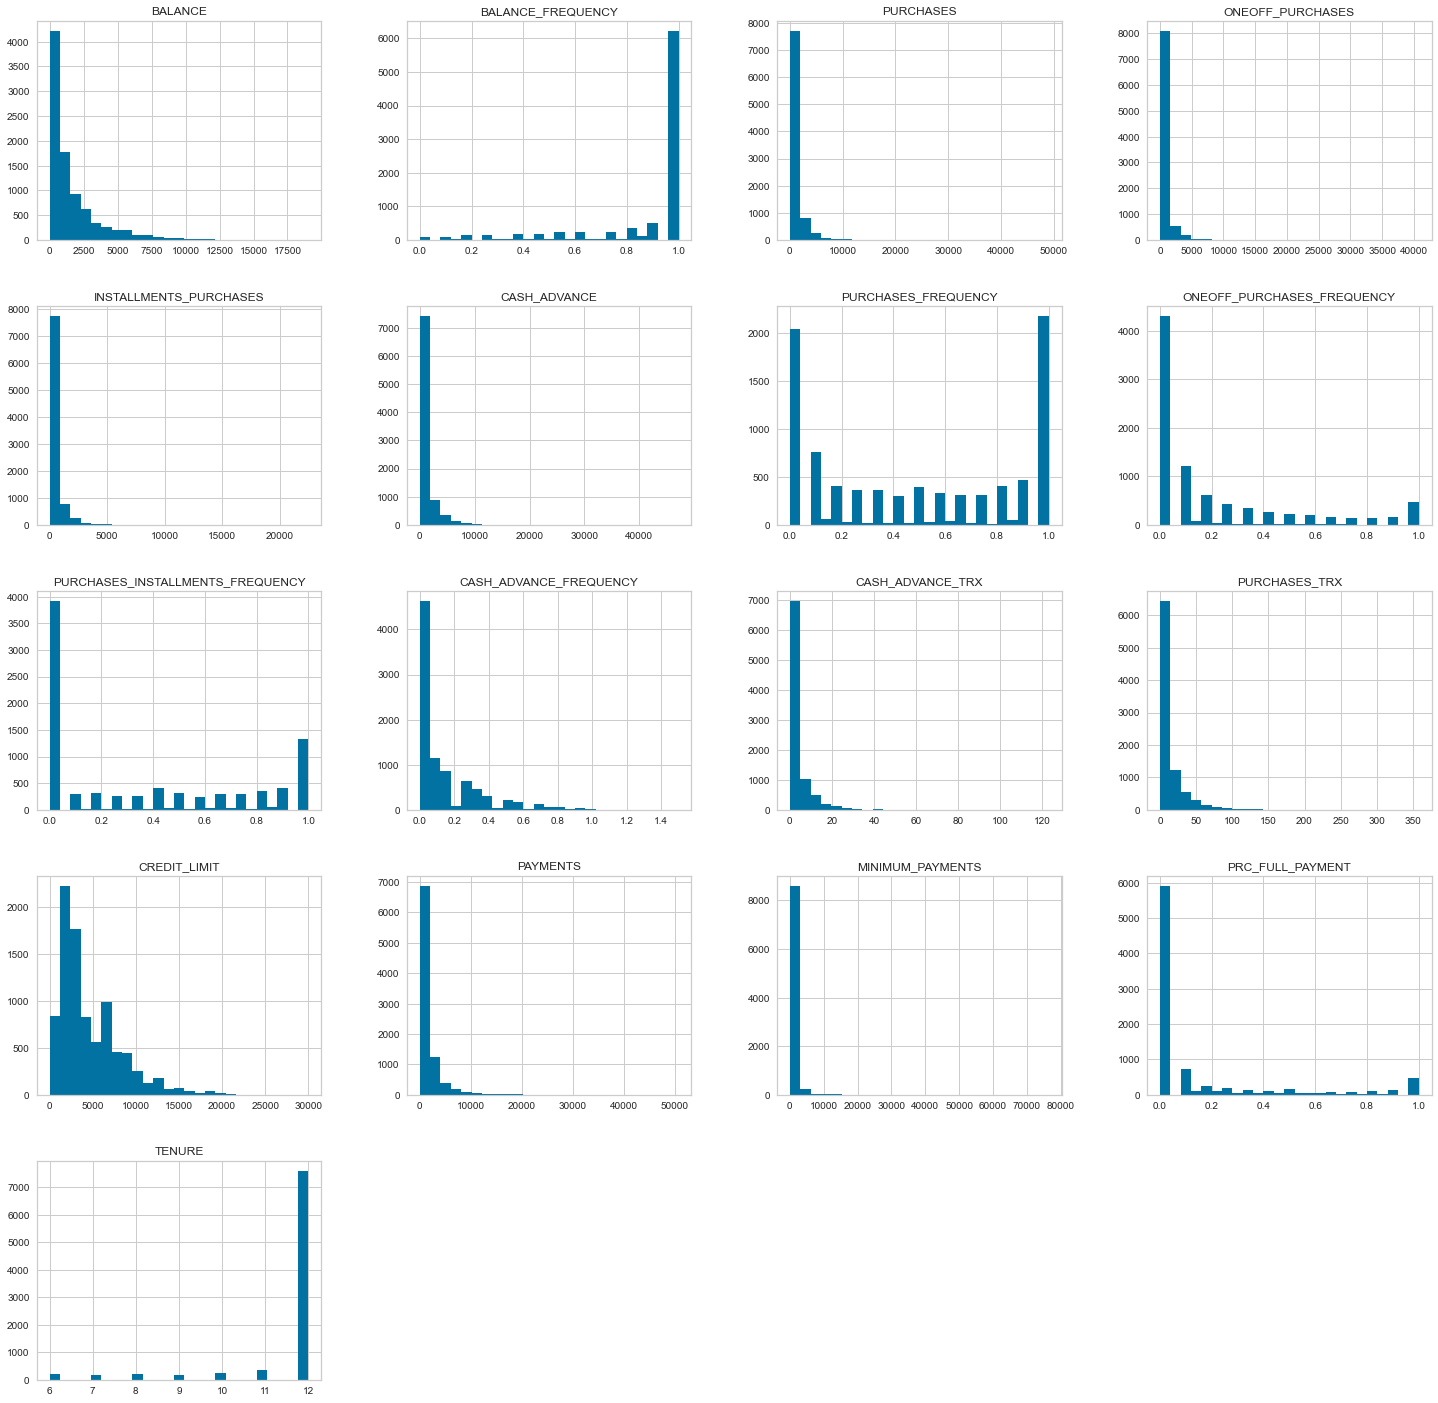

In [9]:
# create histograms of data to check if they have a normal distrubtion
data.hist(bins=25, figsize=(25,25))

In [10]:
# new dataframe to apply transformation and scaling on
data2 = data.copy()
# dropping categorical variable
data2 = data2.drop("CUST_ID", axis = 1)
data2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [11]:
# transforming data
# foot note 5
power = PowerTransformer(method='yeo-johnson', standardize=True)
newdata = power.fit_transform(data2)
# scaling data
scaled_data = MinMaxScaler().fit_transform(newdata)

/Users/hannguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hannguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hannguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hannguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

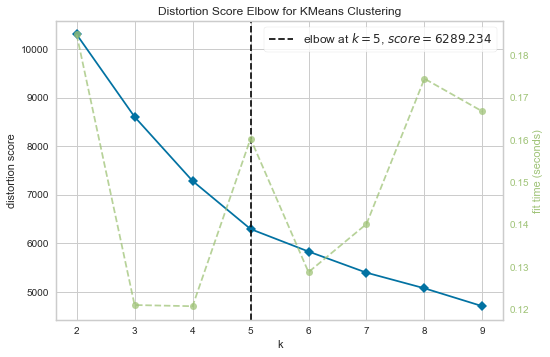

Best number of clusters: 5
Silhouette score of corresponding number of clusters: 6289.234235931658


In [12]:
# applying elbow method
# foot note 6
model = KMeans()
elbow = KElbowVisualizer(model, k=(2,10))
                      
elbow.fit(scaled_data)
elbow.show()
print("Best number of clusters:", elbow.elbow_value_)
print("Silhouette score of corresponding number of clusters:", elbow.elbow_score_)

/Users/hannguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hannguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hannguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hannguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

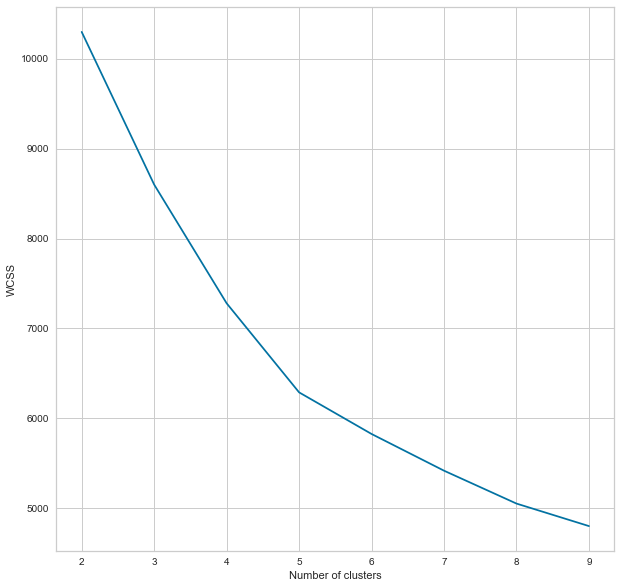

In [13]:
#Elbow Method from homework 
# foot note 7
wcss = []
for i in range(2,10):
  model = KMeans(n_clusters = i, init = "k-means++")
  model.fit(scaled_data)
  wcss.append(model.inertia_)

#Plot Graph
plt.figure(figsize=(10,10))
plt.plot(range(2,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# using PCA to reduce data into lower dimensions
pca2 = PCA(2)
pca2_data = pca2.fit_transform(scaled_data)

/Users/hannguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


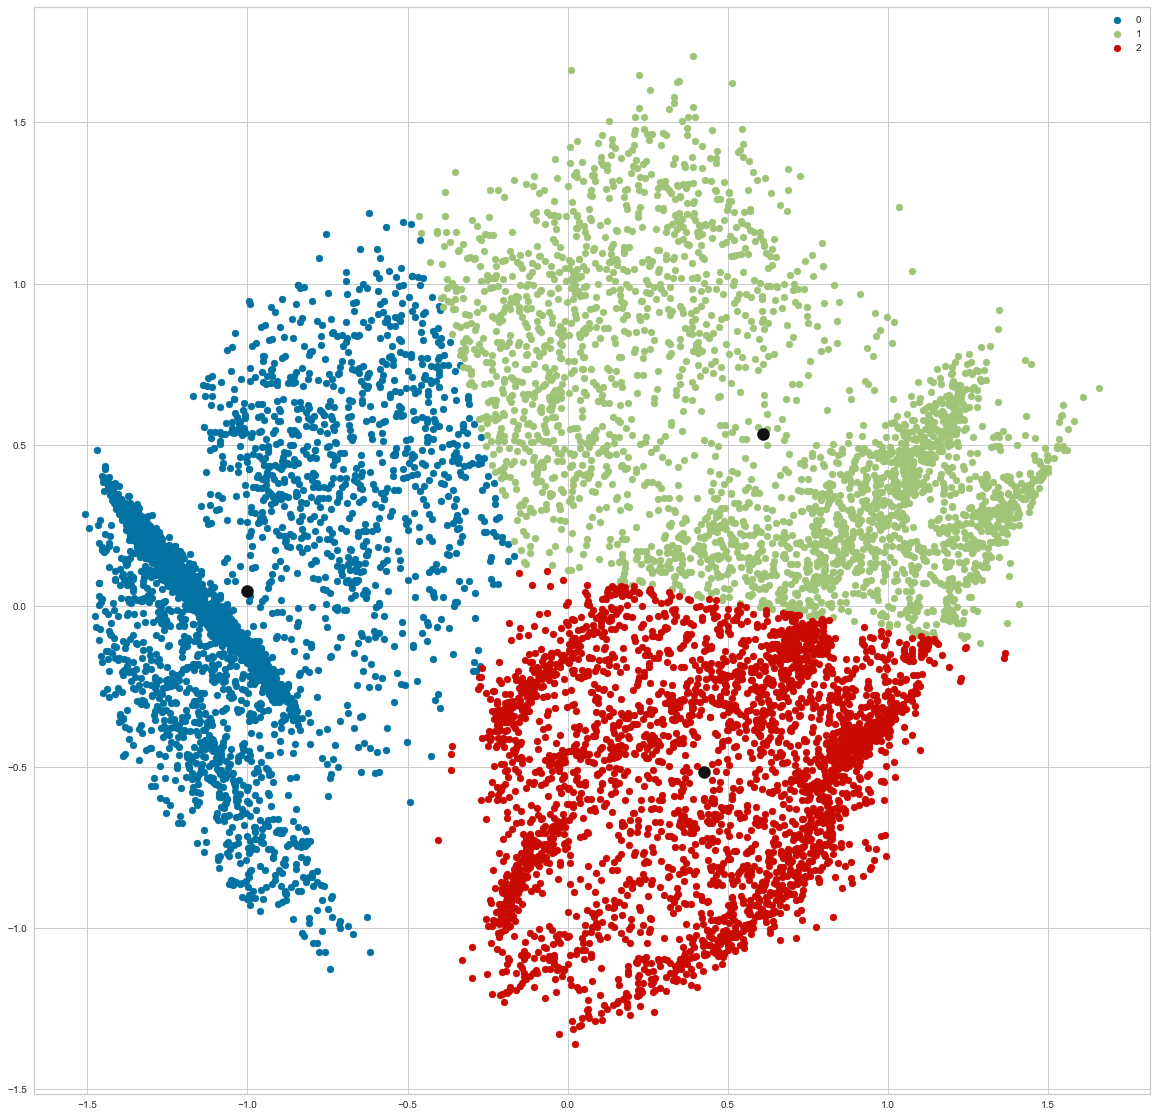

In [15]:
# applying K-Means algorithm with 3 clusters
# footnote 8
kmeans3 = KMeans(n_clusters = 3, init = "k-means++")
label3 = kmeans3.fit_predict(pca2_data)
cluster3 = np.array(kmeans3.cluster_centers_)

# plotting results 
plt.figure(figsize=(20,20))
values3 = np.unique(label3)
for i in values3:
  plt.scatter(pca2_data[label3 == i , 0] , pca2_data[label3 == i , 1] , label = i)

plt.scatter(cluster3[:,0], cluster3[:,1], marker="o", color='k', s=150)
plt.legend()
plt.show()

In [16]:
# calculating silhouette score of 3 clusters
score3 = silhouette_score(pca2_data, kmeans3.labels_, metric='euclidean')
print('Silhouette Score:', score3)

Silhouette Score: 0.44911693718102097


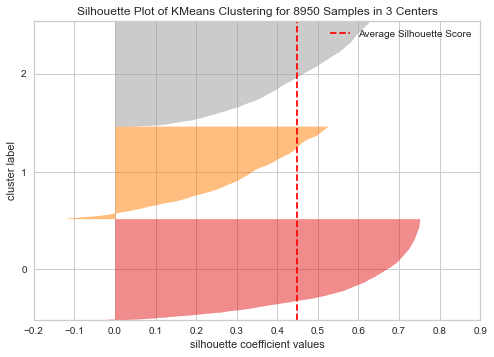

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
# visual representation of silhouette score of 3 clusters
silhouette3 = SilhouetteVisualizer(kmeans3)
silhouette3.fit(pca2_data)
silhouette3.show()

/Users/hannguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


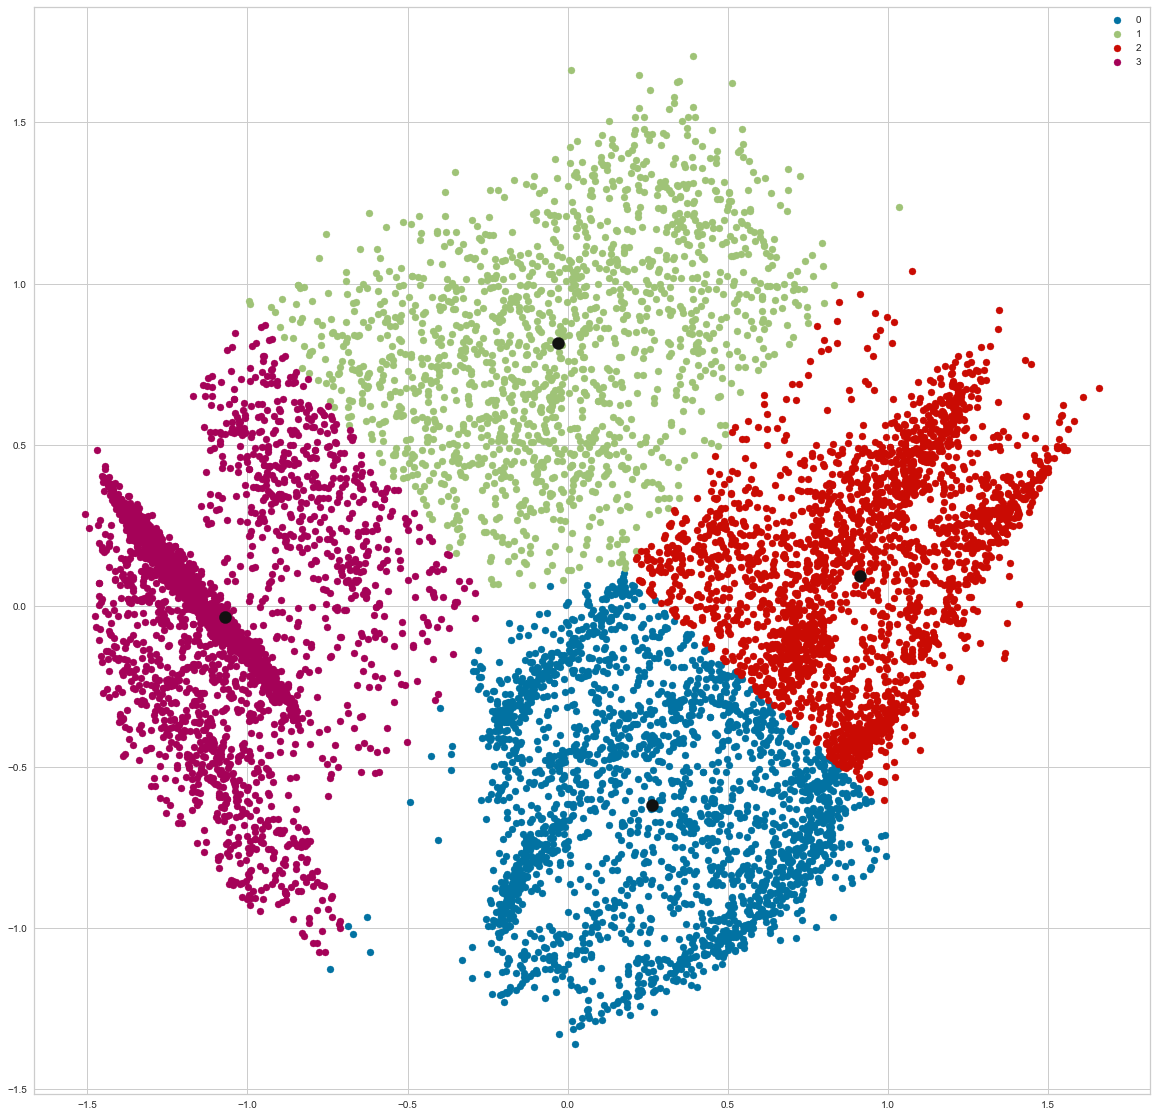

In [18]:
# applying K-Means algorithm with 4 clusters
# footnote 9
kmeans4 = KMeans(n_clusters = 4, init = "k-means++")
label4 = kmeans4.fit_predict(pca2_data)
cluster4 = np.array(kmeans4.cluster_centers_)

# plotting results 
plt.figure(figsize=(20,20))
values4 = np.unique(label4)
for i in values4:
  plt.scatter(pca2_data[label4 == i , 0] , pca2_data[label4 == i , 1] , label = i)

plt.scatter(cluster4[:,0], cluster4[:,1], marker="o", color='k', s=150)
plt.legend()
plt.show()

In [19]:
# calculating silhouette score of 4 clusters
score4 = silhouette_score(pca2_data, kmeans4.labels_, metric='euclidean')
print('Silhouette Score:', score4)

Silhouette Score: 0.4720149703659344


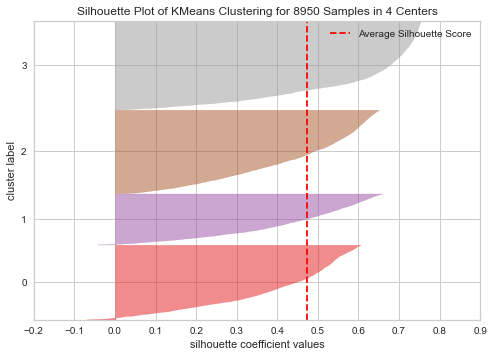

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
# visual representation of silhouette score of 4 clusters
silhouette4 = SilhouetteVisualizer(kmeans4)
silhouette4.fit(pca2_data)
silhouette4.show()

/Users/hannguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


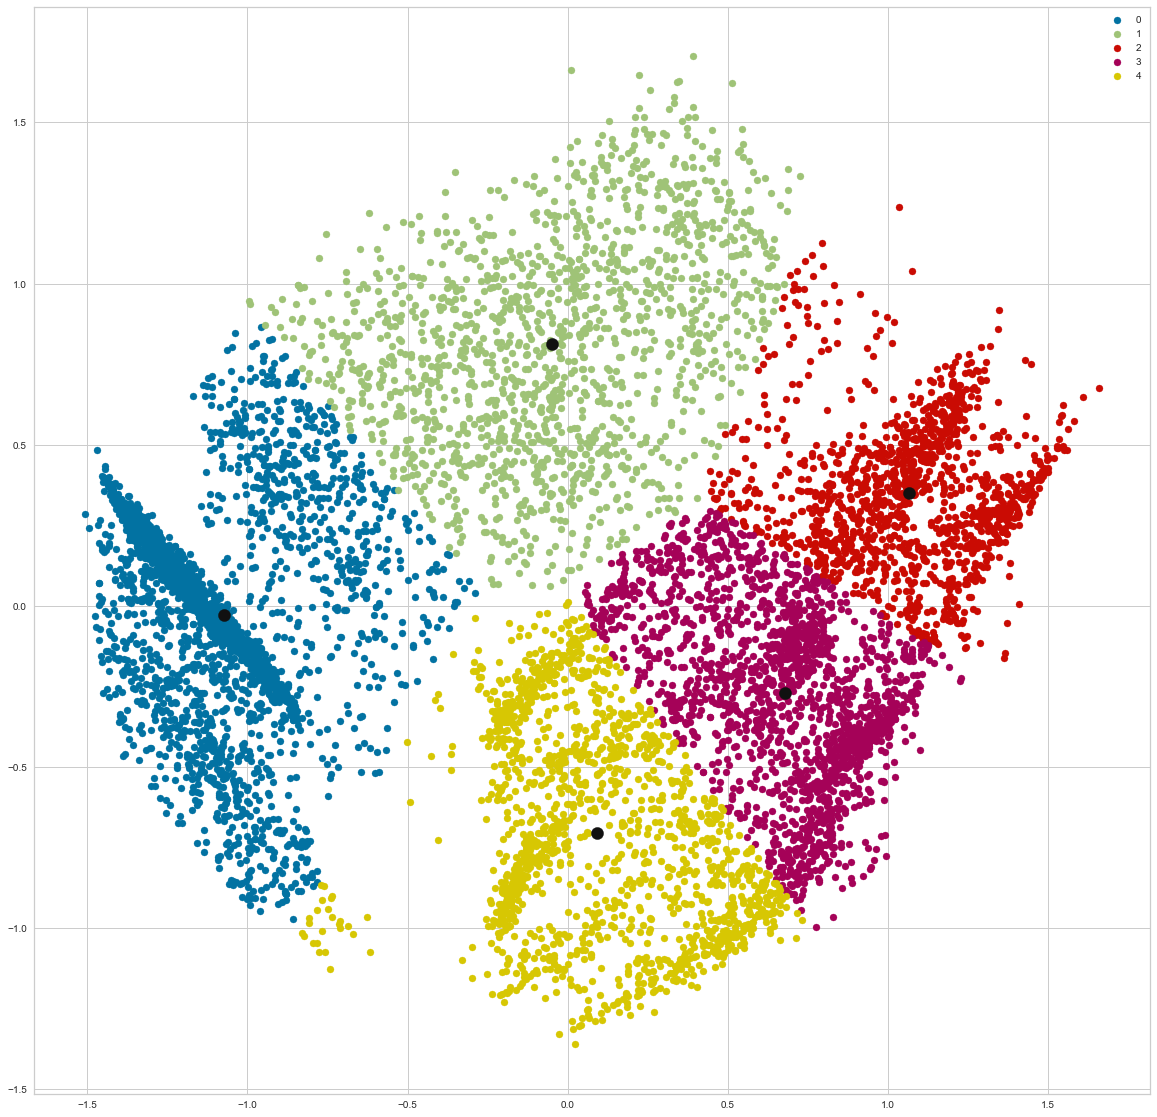

In [21]:
# applying K-Means algorithm with 5 clusters
# footnote 10
kmeans5 = KMeans(n_clusters = 5, init = "k-means++")
label5 = kmeans5.fit_predict(pca2_data)
cluster5 = np.array(kmeans5.cluster_centers_)

# plotting results 
plt.figure(figsize=(20,20))
values5 = np.unique(label5)
for i in values5:
  plt.scatter(pca2_data[label5 == i , 0] , pca2_data[label5 == i , 1] , label = i)

plt.scatter(cluster5[:,0], cluster5[:,1], marker="o", color='k', s=150)
plt.legend()
plt.show()

In [22]:
# calculating silhouette score of 5 clusters
score5 = silhouette_score(pca2_data, kmeans5.labels_, metric='euclidean')
print('Silhouette Score:', score5)

Silhouette Score: 0.448141300875467


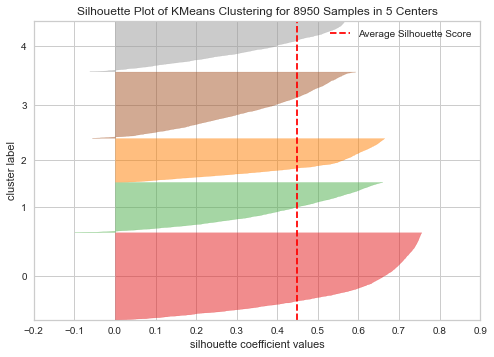

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
# visual representation of silhouette score of 5 clusters
silhouette5 = SilhouetteVisualizer(kmeans5)
silhouette5.fit(pca2_data)
silhouette5.show()

/Users/hannguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


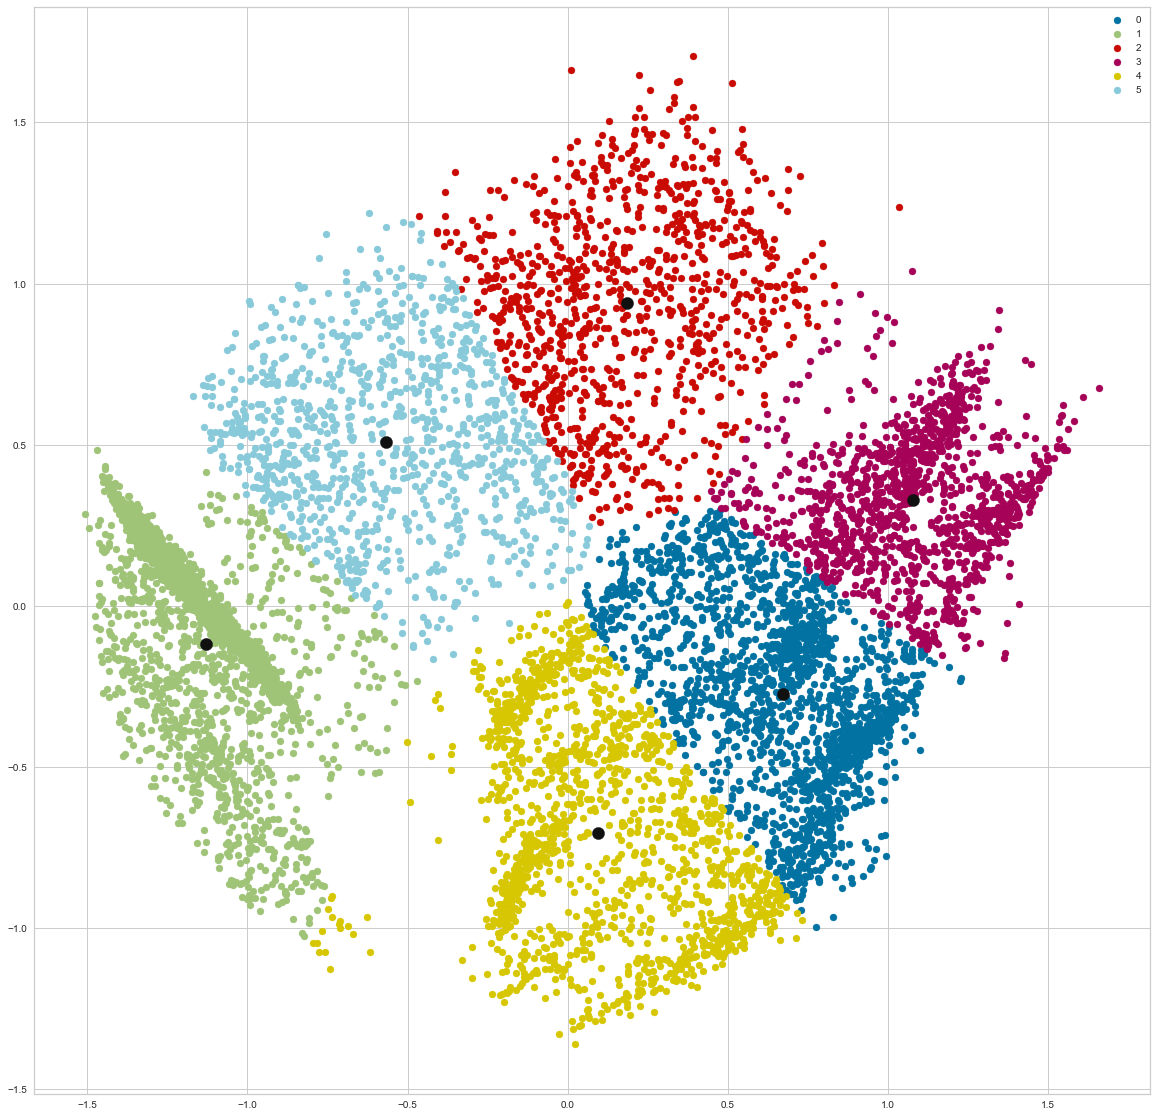

In [24]:
# applying K-Means algorithm with 6 clusters
# footnote 11
kmeans6 = KMeans(n_clusters = 6, init = "k-means++")
label6 = kmeans6.fit_predict(pca2_data)
cluster6 = np.array(kmeans6.cluster_centers_)

# plotting results 
plt.figure(figsize=(20,20))
values6 = np.unique(label6)
for i in values6:
  plt.scatter(pca2_data[label6 == i , 0] , pca2_data[label6 == i , 1] , label = i)

plt.scatter(cluster6[:,0], cluster6[:,1], marker="o", color='k', s=150)
plt.legend()
plt.show()

In [25]:
# calculating silhouette score of 6 clusters
score6 = silhouette_score(pca2_data, kmeans6.labels_, metric='euclidean')
print('Silhouette Score:', score6)

Silhouette Score: 0.41827776383302256


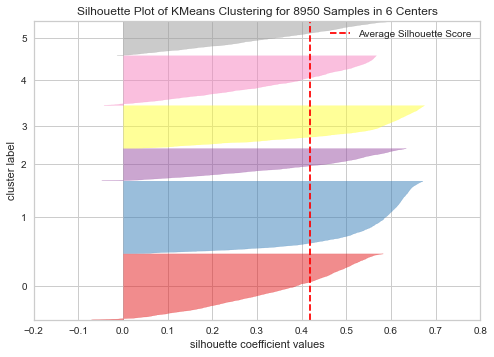

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
# visual representation of silhouette score of 6 clusters
silhouette6 = SilhouetteVisualizer(kmeans6)
silhouette6.fit(pca2_data)
silhouette6.show()

/Users/hannguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


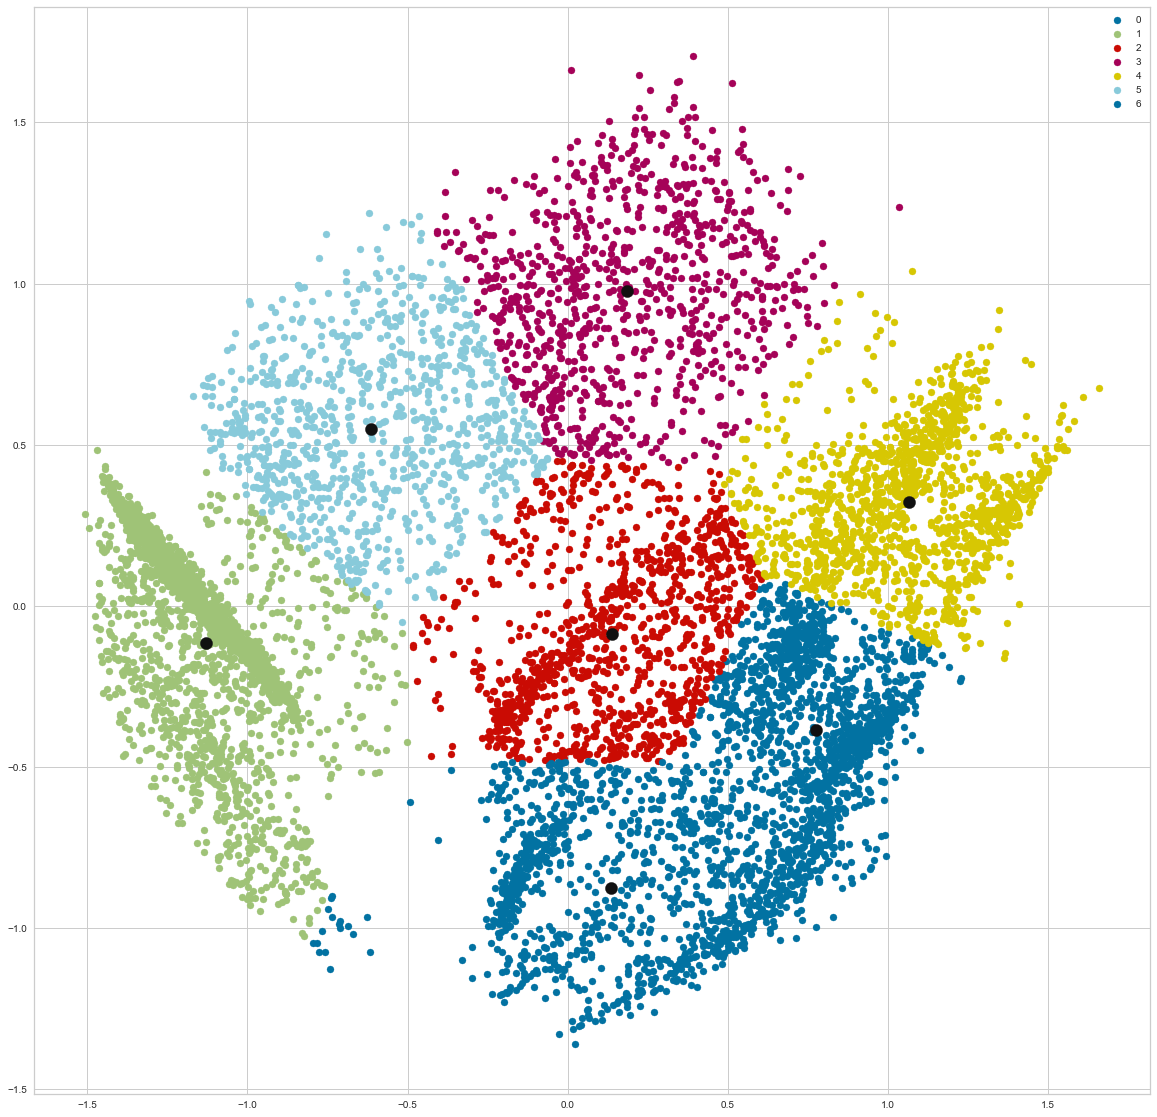

In [27]:
# applying K-Means algorithm with 7 clusters
# footnote 12
kmeans7 = KMeans(n_clusters = 7, init = "k-means++")
label7 = kmeans7.fit_predict(pca2_data)
cluster7 = np.array(kmeans7.cluster_centers_)

# plotting results
plt.figure(figsize=(20,20))
values7 = np.unique(label7)
for i in values7:
  plt.scatter(pca2_data[label7 == i, 0], pca2_data[label7 == i, 1], label = i, cmap=("lavender", "slategrey","lightblue", "green", "yellow"))

plt.scatter(cluster7[:,0], cluster7[:,1], marker="o", color="k", s=150)
plt.legend()
plt.show()

In [28]:
# calculating silhouette score of 7 clusters
score7 = silhouette_score(pca2_data, kmeans7.labels_, metric='euclidean')
print('Silhouette Score:', score7)

Silhouette Score: 0.4349219463337824


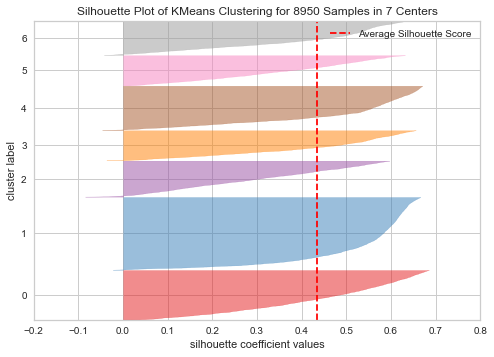

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
# visual representation of silhouette score of 7 clusters
silhouette7 = SilhouetteVisualizer(kmeans7)
silhouette7.fit(pca2_data)
silhouette7.show()

/Users/hannguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


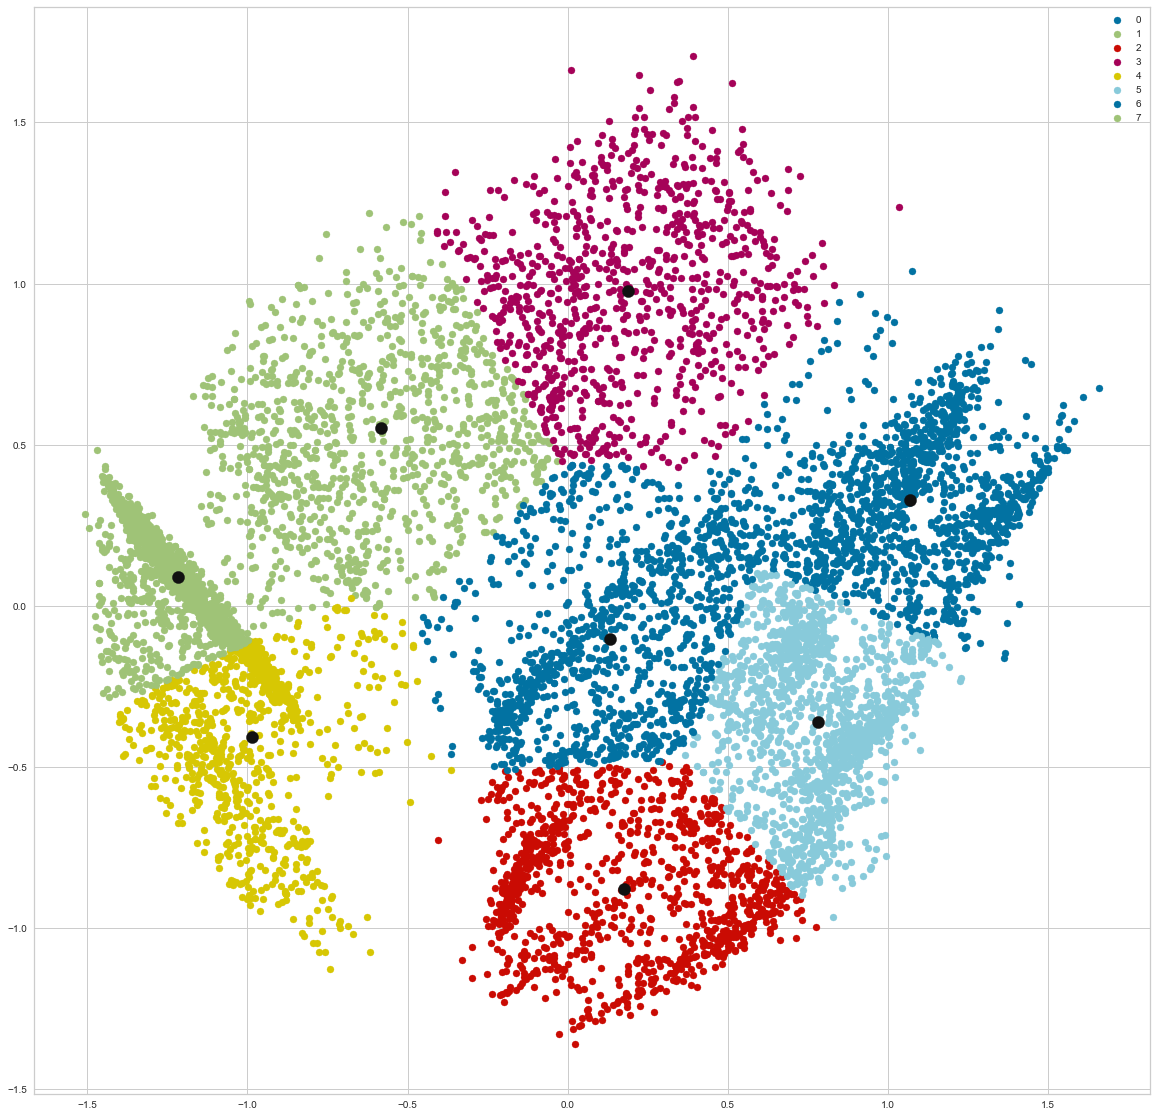

In [30]:
# applying K-Means algorithm with 8 clusters
# footnote 13
kmeans8 = KMeans(n_clusters = 8, init = "k-means++")
label8 = kmeans8.fit_predict(pca2_data)
cluster8 = np.array(kmeans8.cluster_centers_)

# plotting results
plt.figure(figsize=(20,20))
values8 = np.unique(label8)
for i in values8:
  plt.scatter(pca2_data[label8 == i, 0], pca2_data[label8 == i, 1], label = i, cmap=('orange','purple','pink','grey'))

plt.scatter(cluster8[:,0], cluster8[:,1], marker="o", color="k", s=150)
plt.legend()
plt.show()

In [31]:
# calculating silhouette score of 8 clusters
score8 = silhouette_score(pca2_data, kmeans8.labels_, metric='euclidean')
print('Silhouette Score:', score8)

Silhouette Score: 0.41435977171811716


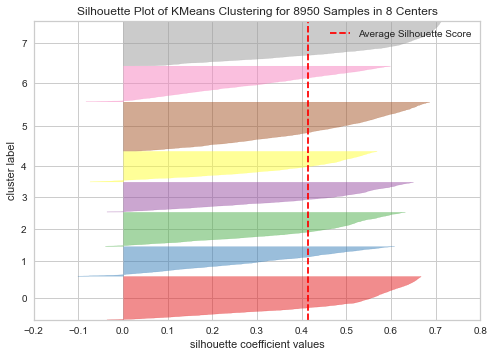

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
# visual representation of silhouette score of 8 clusters
silhouette8 = SilhouetteVisualizer(kmeans8)
silhouette8.fit(pca2_data)
silhouette8.show()

In [33]:
# comparing results of each different number k clusters
print("The score of 3 clusters:", score3)
print("The score of 4 clusters:", score4)
print("The score of 5 clusters:", score5)
print("The score of 6 clusters:", score6)
print("The score of 7 clusters:", score7)
print("The score of 8 clusters:", score8)

The score of 3 clusters: 0.44911693718102097
The score of 4 clusters: 0.4720149703659344
The score of 5 clusters: 0.448141300875467
The score of 6 clusters: 0.41827776383302256
The score of 7 clusters: 0.4349219463337824
The score of 8 clusters: 0.41435977171811716


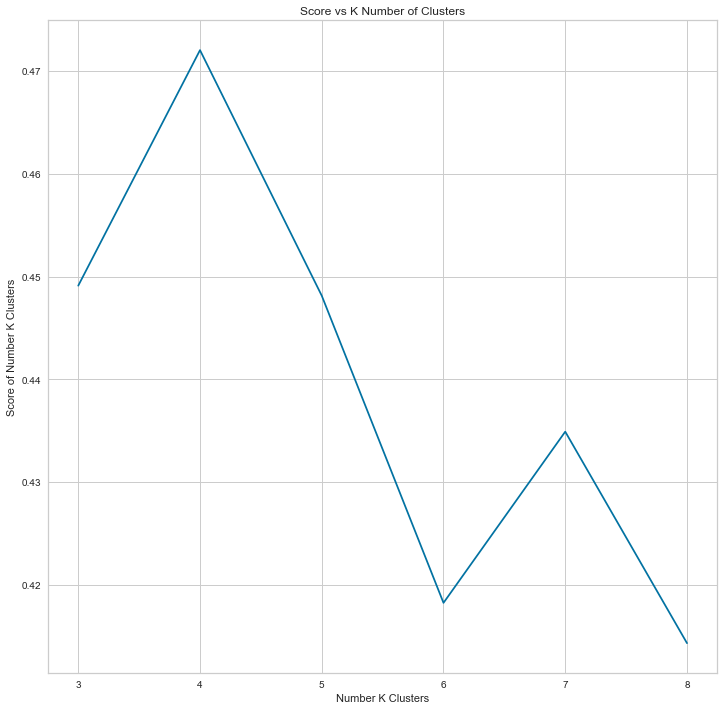

In [34]:
plt.figure(figsize=(12,12))
k = [3,4,5,6,7,8]
scores = [score3, score4, score5, score6, score7, score8]
plt.title("Score vs K Number of Clusters")
plt.xlabel("Number K Clusters")
plt.ylabel("Score of Number K Clusters")

plt.plot(k, scores)
plt.show()

In [35]:
# comparing results of each different number k clusters
print("The inertia of 3 clusters:", kmeans3.inertia_)
print("The inertia of 4 clusters:", kmeans4.inertia_)
print("The inertia of 5 clusters:", kmeans5.inertia_)
print("The inertia of 6 clusters:", kmeans6.inertia_)
print("The inertia of 7 clusters:", kmeans7.inertia_)
print("The inertia of 8 clusters:", kmeans8.inertia_)

The inertia of 3 clusters: 2693.696340381593
The inertia of 4 clusters: 1753.5760037380478
The inertia of 5 clusters: 1439.9600064049196
The inertia of 6 clusters: 1204.2081674331075
The inertia of 7 clusters: 1010.7248853748656
The inertia of 8 clusters: 855.5915245908793


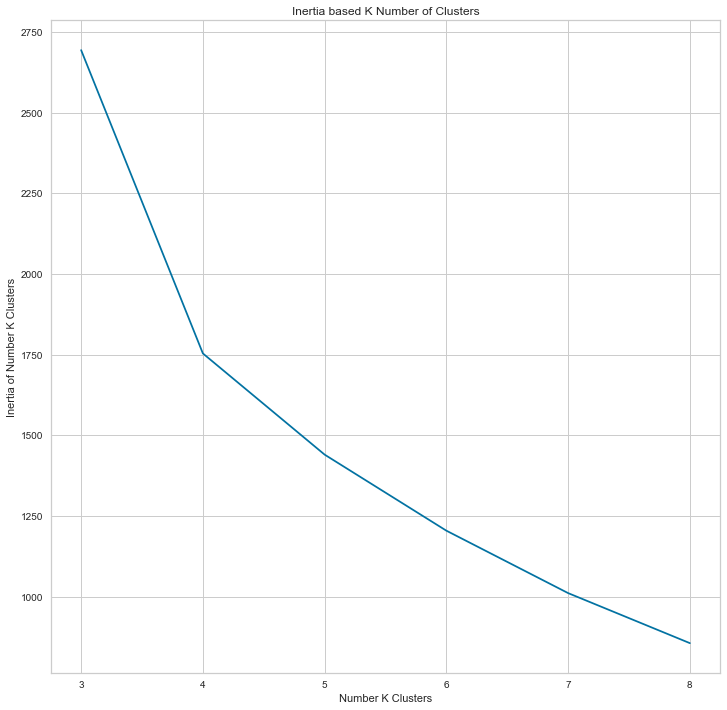

In [36]:
# graphing the inertia based on k-clusters
plt.figure(figsize=(12,12))
k = [3,4,5,6,7,8]
inertia = [kmeans3.inertia_, kmeans4.inertia_, kmeans5.inertia_, kmeans6.inertia_, kmeans7.inertia_, kmeans8.inertia_]
plt.title("Inertia based K Number of Clusters")
plt.xlabel("Number K Clusters")
plt.ylabel("Inertia of Number K Clusters")

plt.plot(k, inertia)
plt.show()

In [38]:
# create new column for clusters using k = 5 clusters
data2["4clusters"] = kmeans4.labels_
data2["5clusters"] = kmeans5.labels_
# new dataframe with clusters
data2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,4clusters,5clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,4
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,3,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6,0,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0,4
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3,0


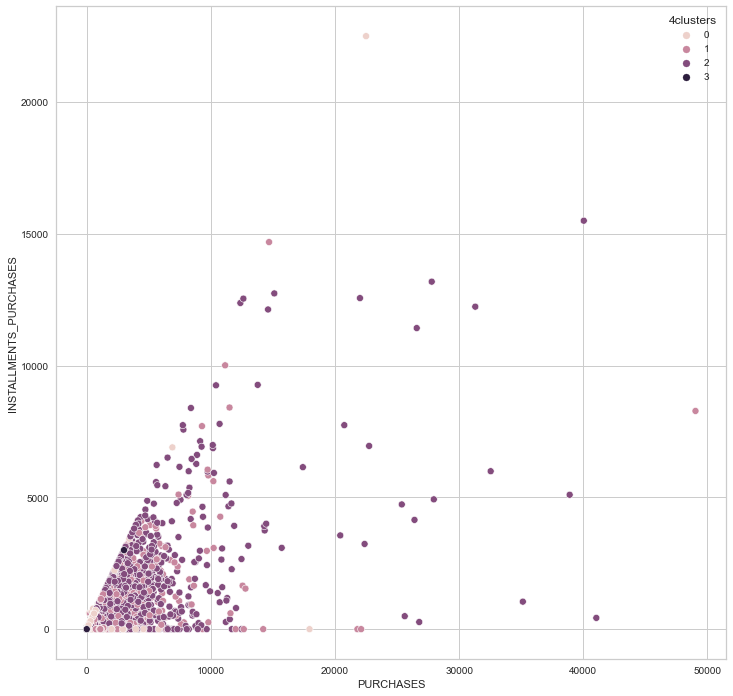

In [68]:
# 4 clusters
plt.figure(figsize=(12,12))
seaborn.scatterplot(data= data2, x=('PURCHASES'),y=('INSTALLMENTS_PURCHASES'), hue='4clusters')
plt.show()

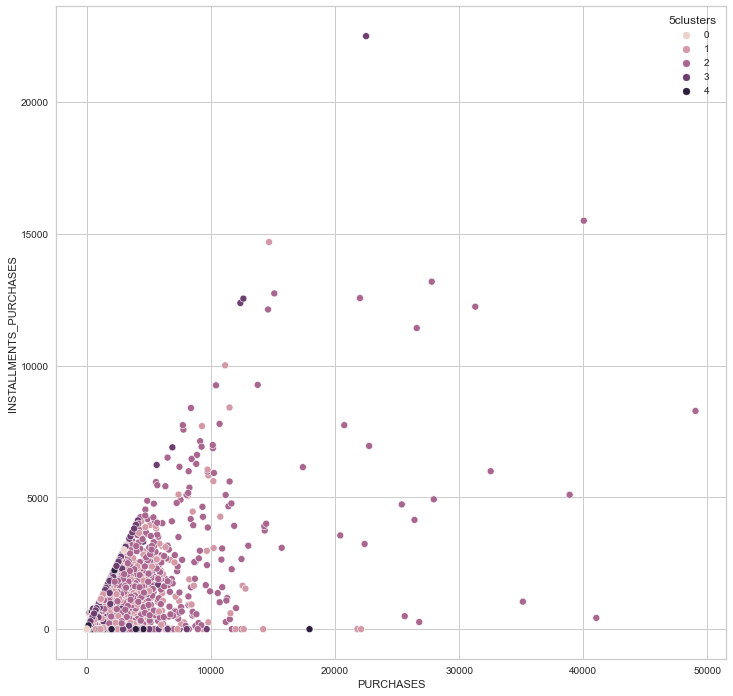

In [70]:
# 5 clusters
plt.figure(figsize=(12,12))
seaborn.scatterplot(data= data2, x=('PURCHASES'),y=('INSTALLMENTS_PURCHASES'), hue='5clusters')
plt.show()

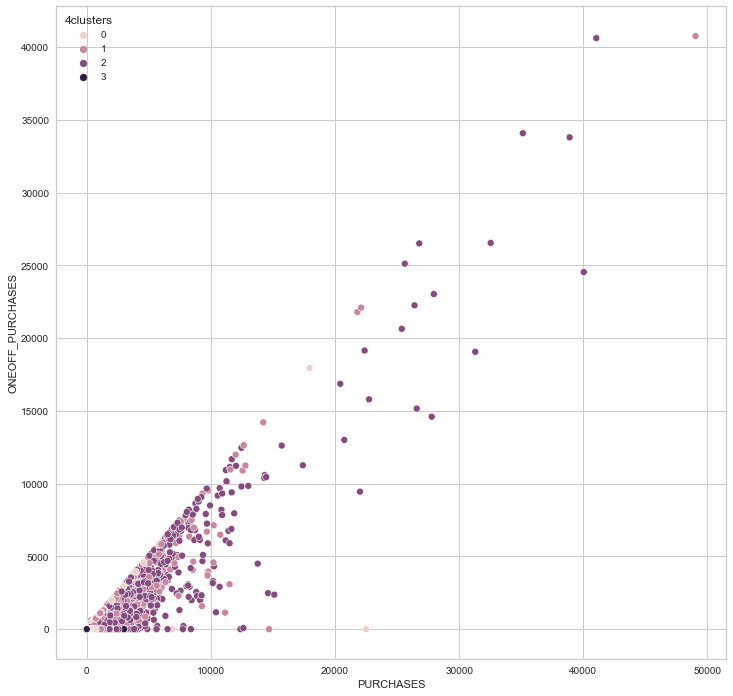

In [69]:
# 4 clusters
plt.figure(figsize=(12,12))
seaborn.scatterplot(data= data2, x=('PURCHASES'),y=('ONEOFF_PURCHASES'), hue='4clusters')
plt.show()

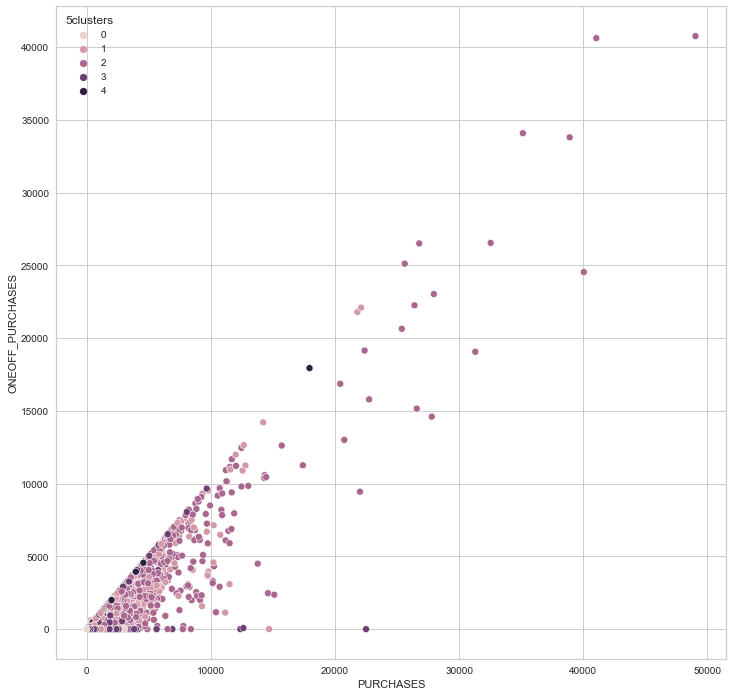

In [71]:
# 5 clusters
plt.figure(figsize=(12,12))
seaborn.scatterplot(data= data2, x=('PURCHASES'),y=('ONEOFF_PURCHASES'), hue='5clusters')
plt.show()

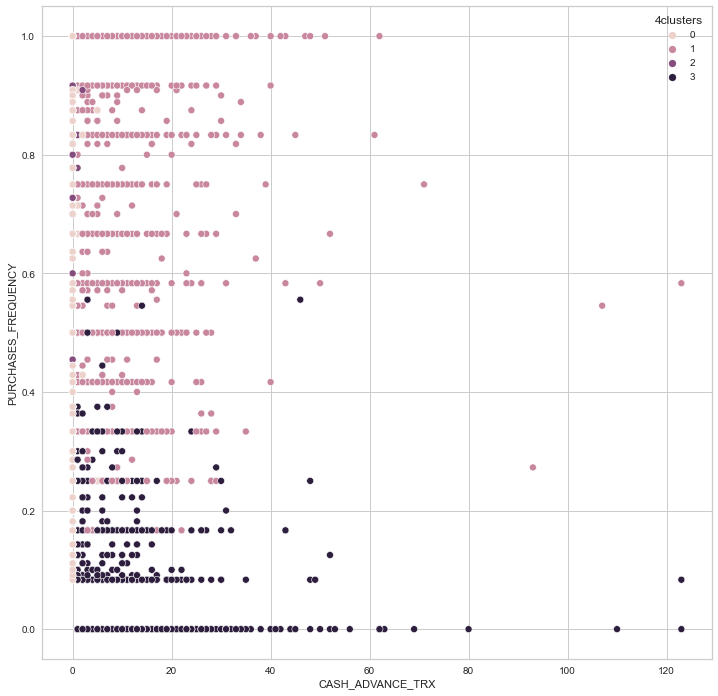

In [61]:
# 4 clusters
plt.figure(figsize=(12,12))
seaborn.scatterplot(data= data2, x=('CASH_ADVANCE_TRX'),y=('PURCHASES_FREQUENCY'), hue='4clusters')
plt.show()

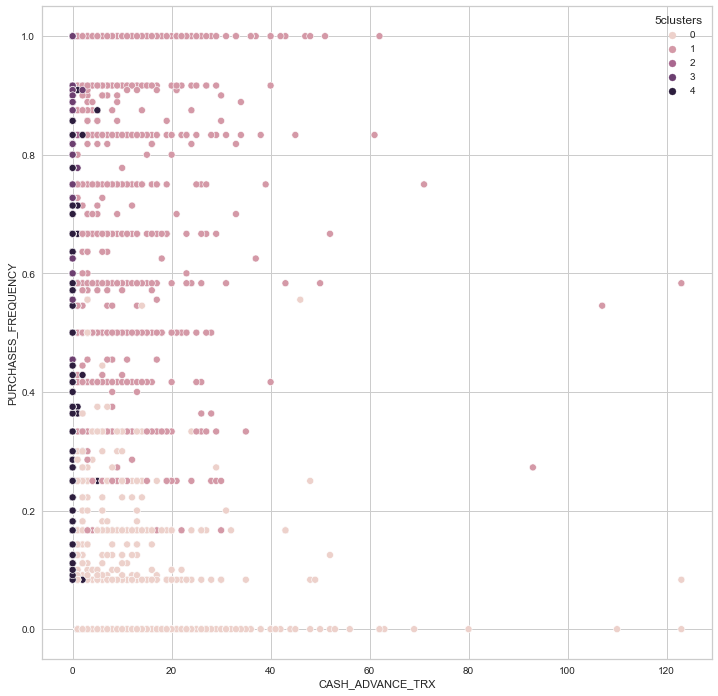

In [72]:
# 5 clusters
plt.figure(figsize=(12,12))
seaborn.scatterplot(data= data2, x=('CASH_ADVANCE_TRX'),y=('PURCHASES_FREQUENCY'), hue='5clusters')
plt.show()

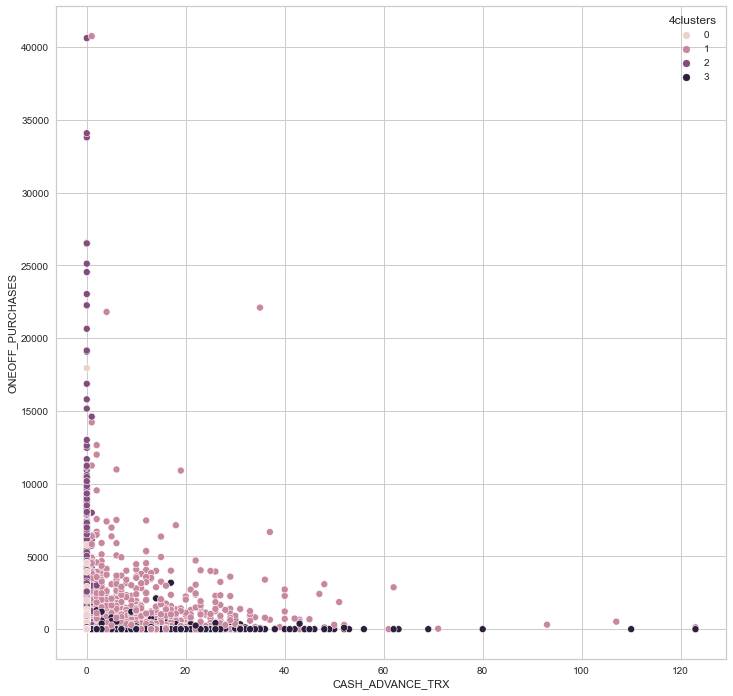

In [63]:
# 4 clusters
plt.figure(figsize=(12,12))
seaborn.scatterplot(data= data2, x=('CASH_ADVANCE_TRX'),y=('ONEOFF_PURCHASES'), hue='4clusters')
plt.show()

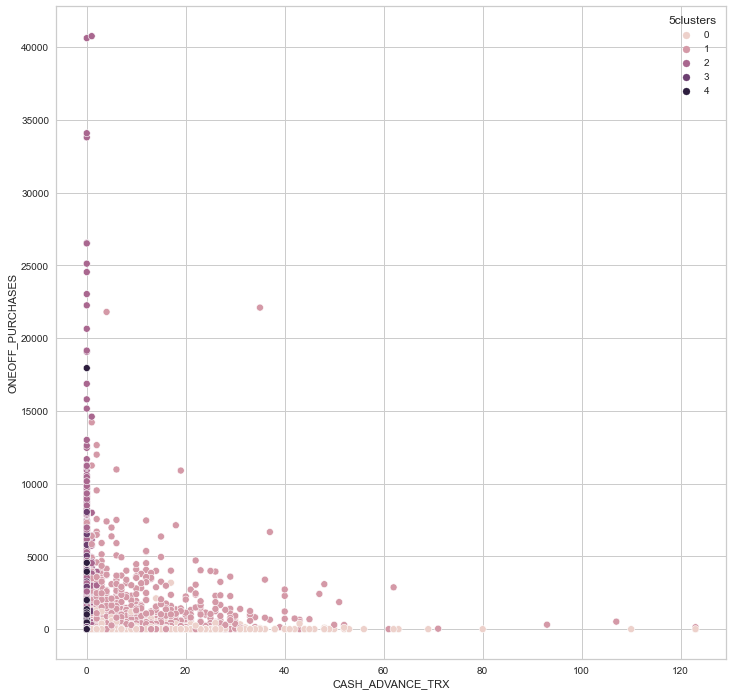

In [73]:
# 5 clusters
plt.figure(figsize=(12,12))
seaborn.scatterplot(data= data2, x=('CASH_ADVANCE_TRX'),y=('ONEOFF_PURCHASES'), hue='5clusters')
plt.show()

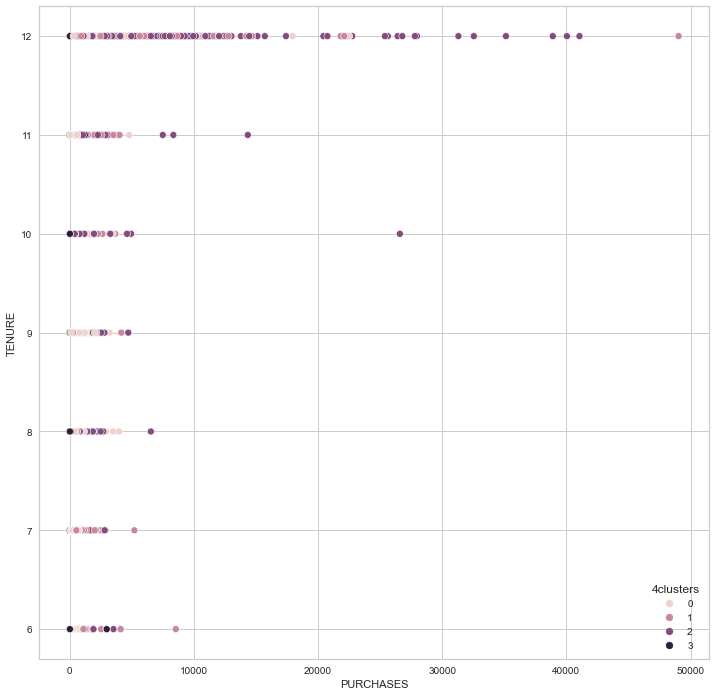

In [65]:
# 4 clusters
plt.figure(figsize=(12,12))
seaborn.scatterplot(data= data2, x=('PURCHASES'),y=('TENURE'), hue='4clusters')
plt.show()

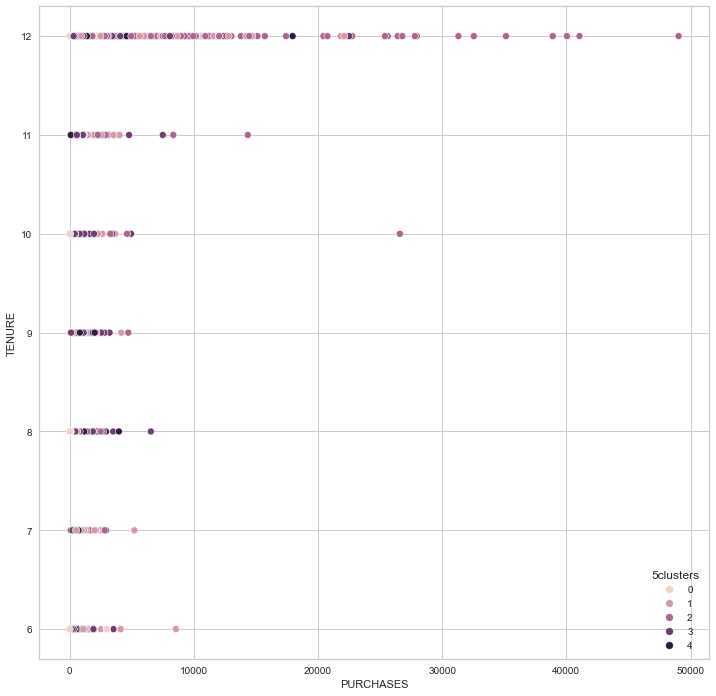

In [74]:
# 5 clusters
plt.figure(figsize=(12,12))
seaborn.scatterplot(data= data2, x=('PURCHASES'),y=('TENURE'), hue='5clusters')
plt.show()

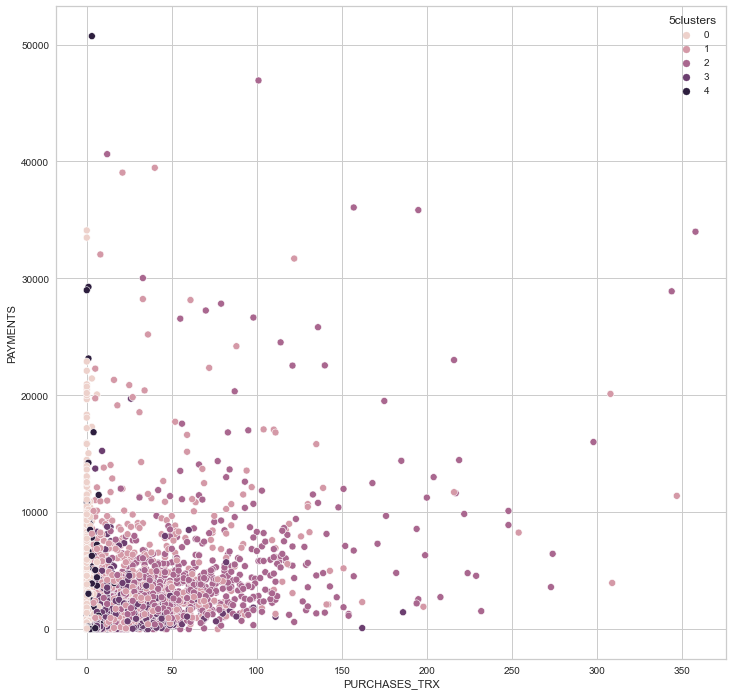

In [79]:
# 5 clusters
plt.figure(figsize=(12,12))
seaborn.scatterplot(data= data2, y=('PAYMENTS'),x=('PURCHASES_TRX'), hue='5clusters')
plt.show()

# Results #

After using the elbow method to determine the optimal amount of K clusters to use, I applied the K-Means algorithm. The elbow method indicated that 5 was the optimal number of clusters to use. To test this, I did the clustering with 4 clusters, 5 clusters, 6 clusters, 7 clusters, and 8 clusters to compare my results. 

After clustering the data, I found that the silhouette Score varied. The lowest number of clusters which was 4 clusters, had the highest silhouette score of 0.472, and also the highest inertia value of 1753.576. The highest number of clusters which was 8 clusters, had the lowest silhouette score of 0.414, and also had the lowest inertia value of 855.611. The inertia seemed to decrease as the number of clusters increase while the silhouette score seemed to vary. However, the score overall followed a similar pattern as the inertia values as the it decreases when the number of clusters increase. 5 clusters resulted in a silhouette score of 0.447 and an inertia value of 1439.892. Since inertia tells us how the distance between the points in each cluster, a lower inertia value is desired.[<sup>14</sup>](#fn14) The lowest inertia value here is 855.611, however it also has the lowest silhouette score which is not desired. We want the highest silhouette score since it shows that a model has the "best" clusters. This is because it compares the the distances of points within a cluster to the distance of points in other clusters.[<sup>15</sup>](#fn15) The number of clusters the elbow method recommended does not fit this measure because a higher silhouette score correlates with 4 clusters rather than 5 clusters.

This is different from what I expected, since I assumed that 5 clusters would result in the highest silhouette score and a lower inertia value compared to the other number of K clusters. I chose 5 clusters since the elbow method produced k = 5, for the optimal amount of clusters.

I noticed a few patterns when clustering the data into 5 groups. For example, as the one off purchases increase, the purchases overall increase. This is espicially notable for the individuals of cluster 2 and less for individuals of cluster 1. However cluster 0, cluster 3, and cluster 4 seem to make less one off purchases. With installment purchases, cluster 2 seem to also spend more and use installment purchase as their method of purchase. Another pattern I observed was that as purchase frequency increases, the cash advance transfers increase for cluster 1. However cluster 0 has low purchase frequency but high cash advance transactions. Cluster 1 and cluster 0 have more cash advance transactions, but cluster 0 is most likely not to spend on one off purchases like cluster 1. Cluster 2, cluster 3, and cluster 4 are most likely not to have cash advance transactions. I also observed that regardless of cluster, those with higher tenure made more purchases. In comparison to 4 clusters, the only notable difference using these same variables, is that for cash advance transactions versus purchase frequency, the data is notably grouped by 2 clusters. These two clusters are seperated by whether it has a higher frequency over 0.4 or lower frequency under 0.4. 

From this, I concluded that cluster 3 and cluster 4 are less likely to use cash and are less likely to make one off purchases. These individuals could be consuming less or that they use their credit card more, but when plotting the purchase transactions or payments against purchase frequency, cluster 1 and cluster 2 seemed to spend the most and buy more. It also seems that cluster 1 and cluster 2 make more one off purchases and more purchases overall. The difference between these two groups might be their willingness to consume or purchasing power. Since cluster 1 has more cash advance transactions and cluster 2 has more installment purchases, it might be related to their economic status. Even though cluster 3 & 4 do not use cash, do not use installment purchases, or do they make one off purchases, they made more purchases if they had longer tenure. Cluster 3 & 4 are not customers who buy or spend a lot. Cluster 0 is a little bit different. Cluster 0 increases in cash advance transactions, but do not make one off purchases or have purchase transactions. However, cluster 0 has a lot of payments being made, which is strange considering that based on the data they use cash more. 

# Conclusions #

To analyze this customer credit card usage behavior data set, I utilized multiple methods to prepare my data for K-Means algorithm application. In order to apply K-Means to this data set and look for patterns, I first checked for missing values and filled them in with reasonable values. I chose to assume that the missing values in minimum payments correlated with the fact that there were no payments to begin with or that the individual did not or could not pay for them. I then, transformed my data to fix non-normality and high correlation and then scaled it so that it was within a numeric range for principal component analysis. Then I applied PCA transformation on my data so that when clustering, I can graph my results and my variables have equal importance in comparison to other variables. I checked for the optimal number of clusters using the elbow method and calculated the silhouette score and inertia value to compare the different numbers of clusters. After deciding on the optimal number of clusters, which I chose 5, I fitted plots based on different variables and the cluster they belonged to. This allowed me to make connections and discover patterns about the individuals from each cluster. The process of figuring if the methods applied were appropriate, finding the optimal number of clusters, and analyzing the data clusters was difficult and surprising. 

# References #


Amelia, Azika. “K-Means Clustering: From A to Z.” Medium, Towards Data Science, 28 Sept. 2018, https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a. 

<span id="fn1"> Varia, Mayank. DS121: Foundations of Data Science II. 13 Sep. 2022, Boston University, Boston. Class lecture.</span>

<span id="fn2"> Varia, Mayank. DS121: Foundations of Data Science II. 13 Sep. 2022, Boston University, Boston. Class lecture </span>

<span id="fn3"> Sagar, Abhinav. “Customer Segmentation Using K Means Clustering.” Medium, Towards Data Science, 3 Dec. 2019, https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3. </span>

<span id="fn4">  Bhasin, Arjun. “Credit Card Dataset for Clustering.” Kaggle, 2 Mar. 2018, https://www.kaggle.com/datasets/arjunbhasin2013/ccdata. </span>

<span id="fn5"> Brownlee, Jason. “How to Use Power Transforms for Machine Learning.” MachineLearningMastery.com, 27 Aug. 2020, https://machinelearningmastery.com/power-transforms-with-scikit-learn/. </span>

<span id="fn6"> “Elbow Method.” Elbow Method - Yellowbrick v1.5 Documentation, https://www.scikit-yb.org/en/latest/api/cluster/elbow.html.</span>

<span id="fn7">"Solution_HW9." DS121: Foundations of Data Science II, Boston University, 2022.</span>

<span id="fn8"> "Solution_HW9." DS121: Foundations of Data Science II, Boston University, 2022.</span>

<span id="fn9"> "Solution_HW9." DS121: Foundations of Data Science II, Boston University, 2022.</span>

<span id="fn10"> "Solution_HW9." DS121: Foundations of Data Science II, Boston University, 2022.</span>

<span id="fn11"> "Solution_HW9." DS121: Foundations of Data Science II, Boston University, 2022.</span>

<span id="fn12"> "Solution_HW9." DS121: Foundations of Data Science II, Boston University, 2022.</span>

<span id="fn13"> "Solution_HW9." DS121: Foundations of Data Science II, Boston University, 2022.</span>
\
<span id="fn14"> Varia, Mayank. DS121: Foundations of Data Science II. 24 Nov. 2022, Boston University, Boston. Class lecture</span>

<span id="fn15"> Varia, Mayank. DS121: Foundations of Data Science II. 13 Sep. 2022, Boston University, Boston. Class lecture</span>


